# Задание 4 - Реализация сверточной нейронной сети LeNet на Keras


In [ ]:
# Load data
%%bash
git clone https://github.com/balezz/modern_dl.git
cd modern_dl
mkdir data
cd data
wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz > /dev/null
tar -xzvf cifar-10-python.tar.gz > /dev/null

In [ ]:
%cd modern_dl

/content/modern_dl


In [ ]:
import random
import numpy as np
from lib.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

In [ ]:
# Путь к папке с данными
cifar10_dir = 'data/cifar-10-batches-py'

# Очистим значения переменных, чтобы избежать проблем с излишним потреблением памяти
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

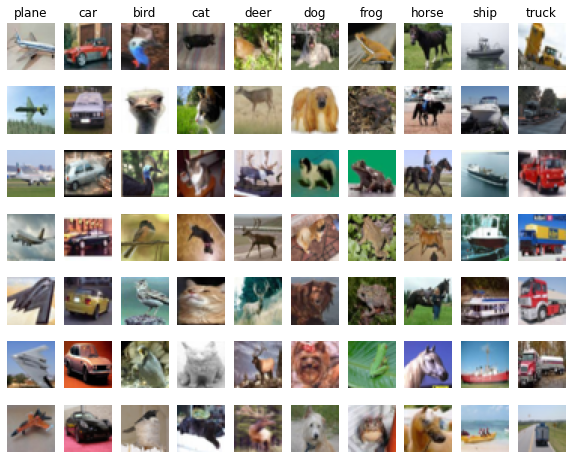

In [ ]:
# Перед началом работы полезно посмотреть на данные.
# Отобразим пример из каждого класса.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
# Разделим данные на выборки train, val, test

num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 16

# Для валидации используем подвыборку train
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# На остальных данных из train будем тренировать модель
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# Чтобы ускорить разработку, создадим также небольшую dev выборку 
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Для тестирования используем оригинальную выборку test
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


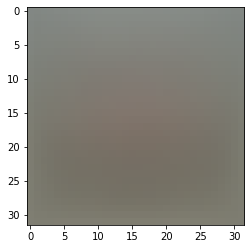

(49000, 32, 32, 3) (1000, 32, 32, 3) (1000, 32, 32, 3) (16, 32, 32, 3)


In [ ]:
# Нормализуем значения яркости пикселей 
mean_image = np.mean(X_train, axis=0)

# визуализируем среднюю яркость
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

# Вычтем средние значения яркости
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image


print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

# LeNet architecture

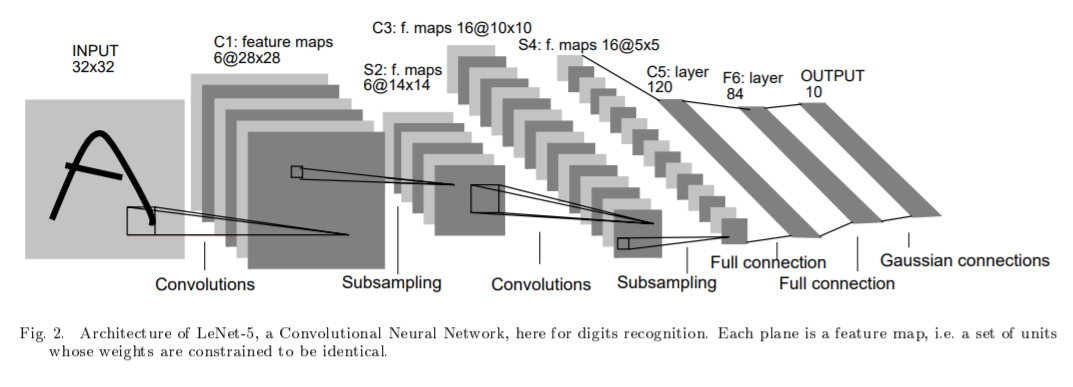

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers

class LeNet(models.Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
        self.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
        self.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
        self.add(layers.Flatten())
        self.add(layers.Dense(84, activation='tanh'))
        self.add(layers.Dense(nb_classes, activation='softmax'))        

In [ ]:
# Create LeNet instance
IMAGE_SHAPE = (32, 32, 3)
NUM_CLASSES = 10

lenet = LeNet(IMAGE_SHAPE, NUM_CLASSES)
lenet.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD')

In [ ]:
# transform y indexes to sparse representation: [2] -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_dev_sparse = keras.utils.to_categorical(y_dev, num_classes=NUM_CLASSES)

# Check initial loss and overfitting model with small dev dataset
hist = lenet.fit(X_dev, y_dev_sparse, batch_size=32, epochs=10)

Epoch 1/10
1/1 [==============================] - 30s 30s/step - loss: 2.3785
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 1.7755
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 1.3299
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 1.0562
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.8342
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6686
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.5568
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 0.4766
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 0.4104
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3611


# Ну что, давайте уже тренировать сеть!

In [ ]:
BS = 64
LR = 1e-4
EPOCHS = 16

lenet = LeNet(IMAGE_SHAPE, NUM_CLASSES)
optimizer = keras.optimizers.Adam(learning_rate=LR)
lenet.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

y_train_sparse = keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
hist = lenet.fit(X_train, y_train_sparse, validation_split=0.2, batch_size=BS, epochs=EPOCHS)

Epoch 1/16
613/613 [==============================] - 8s 11ms/step - loss: 1.7990 - accuracy: 0.3727 - val_loss: 1.7343 - val_accuracy: 0.3953
Epoch 2/16
613/613 [==============================] - 6s 10ms/step - loss: 1.6383 - accuracy: 0.4335 - val_loss: 1.6519 - val_accuracy: 0.4332
Epoch 3/16
613/613 [==============================] - 7s 11ms/step - loss: 1.5491 - accuracy: 0.4651 - val_loss: 1.6028 - val_accuracy: 0.4477
Epoch 4/16
613/613 [==============================] - 6s 10ms/step - loss: 1.4782 - accuracy: 0.4911 - val_loss: 1.5716 - val_accuracy: 0.4599
Epoch 5/16
613/613 [==============================] - 6s 10ms/step - loss: 1.4185 - accuracy: 0.5138 - val_loss: 1.5362 - val_accuracy: 0.4736
Epoch 6/16
613/613 [==============================] - 6s 10ms/step - loss: 1.3687 - accuracy: 0.5305 - val_loss: 1.5267 - val_accuracy: 0.4762
Epoch 7/16
613/613 [==============================] - 6s 10ms/step - loss: 1.3251 - accuracy: 0.5468 - val_loss: 1.5055 - val_accuracy: 0.4823

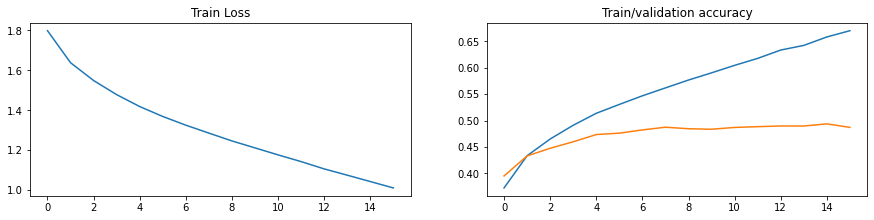

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(hist.history['loss'])
plt.subplot(222)
plt.title("Train/validation accuracy")
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

# Как видно из графиков, модель переобучилась  
Поэкспериментируйте с гиперпараметрами и архитектурой, чтобы получить точность на тесте больше 80%

In [ ]:
# Experiment here!


In [ ]:
def multiclass_accuracy(y_pred, y_true):
  return np.mean(np.equal(y_true, np.argmax(y_pred, axis=1)))

y_test_pred = lenet.predict(X_test)
test_accuracy = multiclass_accuracy(test_pred, y_test)

print('LeNet test set accuracy: %f' % (test_accuracy, ))
assert test_accuracy > 0.8

LeNet test set accuracy: 0.499000


AssertionError: ignored